# EBA3500 Exercises 7

The following definition wasn't included in the lectures, but was implicitly used in the last part of part (ii).
#### Definition: Categorical regression with one category
> Let $A_1, A_2, ..., A_k$ be sets and $x$ be a vector whose $i$th element is in $A_i$. Then the linear regression model based on these sets (or these categorical variables) is
$$
y = \sum_{i=1}^k \sum_{a_i\in A_i} \beta_{a_i} 1[x_i \textrm{ = }a_i] + \epsilon,\quad x_i \textrm{ in } A_i.
$$

For instance, let $A_1 = \{\textrm{female}, \textrm{male}\}$ and $A_2 = \{\textrm{Biscoe}, \textrm{Dream}, \textrm{Torgersen}\}$. Then the regression model based on these categorical variables is
$$ 
y = \sum_{a_1\in A_1} \beta_{a_i} 1[x_1 \textrm{ = }a_1] + \sum_{a_2\in A_2} \beta_{a_2} 1[x_i \textrm{ = }a_2] + \epsilon
$$
which equals
$$
y = \beta_{\textrm{female}}1[x_1 =\textrm{female}] + \beta_{\textrm{male}}1[x_1 =\textrm{male}] + \beta_{\textrm{Biscoe}}1[x_2 =\textrm{Biscoe}]+\beta_{\textrm{Dream}}1[x_2 =\textrm{Dream}] + \beta_{\textrm{Torgersen}}1[x_2 =\textrm{Torgersen}] + \epsilon
$$

## Exercise 1: Review exercises

1.   Define the indicator function $1[x\textrm{ in }A]$. 
4.   What are, roughly, the three types of statistical data?
2.   What is the definition of regression with categorical variables in a set $A$?
2.   What does `y ~ C(x)` do in `statsmodels`?
3.   What is the difference between `y ~ C(x) - 1` and `y ~ C(x)`?
4.   Why would you want to use `y ~ C(x)` instead of `y ~ C(x) - 1`?




### Exercise 2: Penguin plots

We went through several plotting functions in part (ii) of the lecture, and have covered some before too. Let's employ them on the penguin data set!

In [8]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

## (a)
Visualize the number of males and females by the island and species categories. Comment briefly on the plot. (*Hint:* Use `sns.catplot`!)

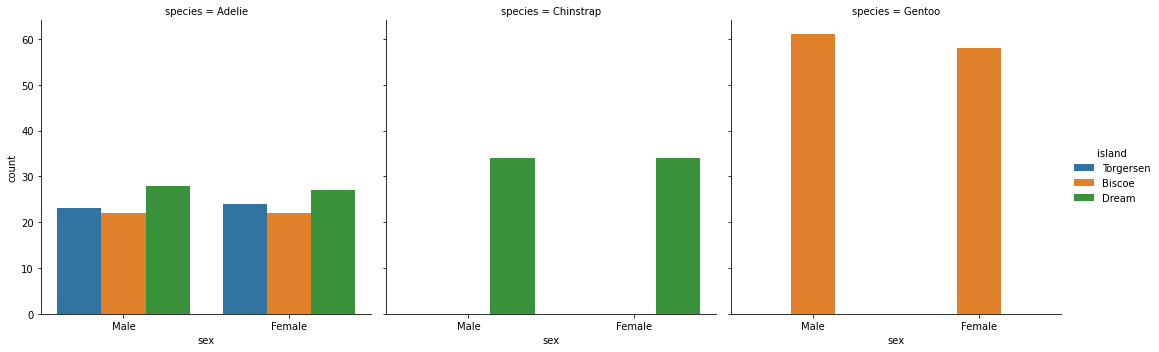

In [11]:
sns.catplot(x="sex",hue="island",col="species",data=penguins, kind="count")

### (b)
Is there any relationsship between `island` and `species` on one hand, and probability of being female on the other hand? Make a guess first, an then run the logistic regression `sex ~ island + species`.

### (c)
Plot the flipper length by sex, species, and island. Comment on the results. (*Hint:* Use `sns.catplot` again.) 

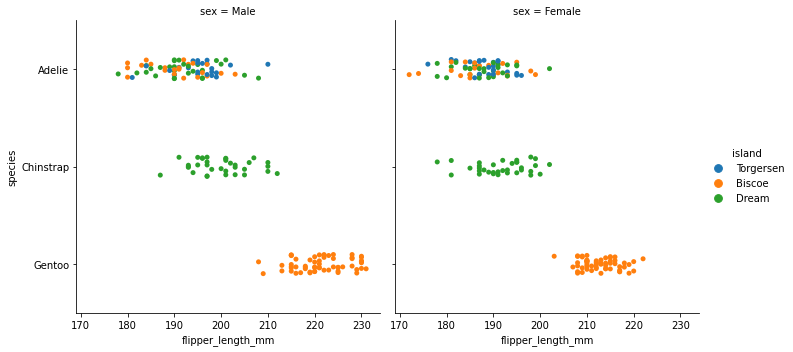

In [14]:
sns.catplot(x="flipper_length_mm",hue="island",y="species", col = "sex",data=penguins)

## Exercises 3: Interpreting penguins

Consdiser the following regression model,

In [7]:
import seaborn as sns
import statsmodels.formula.api as smf
penguins = sns.load_dataset("penguins")
fit = smf.ols("bill_length_mm ~ island + species + sex", data = penguins).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     302.0
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          3.36e-120
Time:                        11:53:50   Log-Likelihood:                -750.43
No. Observations:                 333   AIC:                             1513.
Df Residuals:                     327   BIC:                             1536.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               37.1263      0.373     99.550      0.000      36.393      37.860
island[T.Dream]         -0.4886      0.470     -1.039      0.300      -1.414       0.436
island[T.Torgersen]      0.1026      0.488      0.210      0.833      -0.857       1.062
species[T.Chinstrap]    10.3474      0.422     24.541      0.000       9.518      11.177
species[T.Gentoo]        8.5465      0.410     20.834      0.000       7.739       9.353
sex[T.Male]              3.6975      0.255     14.508      0.000       3.196       4.199
==============================================================================
Omnibus:                       35.395   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.335
Skew:                           0.523   Prob(JB):                     4.86e-19
Kurtosis:                       5.233   Cond. No.                         7.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (a)
Comment on the $R^2$, the *p*-values and the *t*-values. How do you interpret them? Are there any covariates that do not appear to matter very much?

### (b)
What are the baseline covariates in this model? That is, what values of `island`, `species`, and `sex` are absorbed into the intercept?

### (c)
1. Predict the bill length of a *female* penguin on the island *Biscoe* of the species *Gentoo*. You should use the parameters (i.e. `fit.params`) of the regression model, but use the `predict` method (and similar methods) only to validate. You should be able to do the calculation correctly using this information only.
2. Predict the bill length of a *male* penguin on the island *Dream* of the species *Chinstrap*.
3. Predict the bill length of a *female* penguin on the island *Biscoe* of the species *Adelie*.

### (d)
I want you to predict the bill length of my penguin. However, I've messed up! Due to a serious case of sensory malfunction, I can't distinguish the species *Chinstrap* and *Adelie* from one another. Make a regression model `fit2` that predicts the bill length from `islands`, `sex` and `species`, but that cannot differentiate between *Chinstrap* and *Adelie*. Use it to predict the bill length of a *female* penguin on *Biscoe* of species either equal to *Chinstrap* or *Adelie*. 
**Hint:** Can you make a new column in `penguins` that merges Chinstrap and Adelie into a single "species"?

### (e) 
For the model `fit2` you made in the previous problem, predict the value a penguin with species *Gentoo*. Compare your prediction to that of `fit`. 

## Exercise 3: Indicator functions and regression



## (a)
Using the `titanic` data from lecture (ii), spell out `Survived ~ Sex` using indicator functions. Remember to take the baseline into account.



## (b)
Spell out `Survived ~ Class` using indicator functions. Again, remember the baseline!



## (c)
Spell out `Survived ~ Class + Sex` using indicator functions. 

## Exercise 4 (🐯): Interpreting logistic regression
Interpreting the parameters of the logistic regression model is hard, but doable. We'll explore one way to do it in this exercise.

### (a)
Simulate matrix $x$ containing $n = 1000000$ rows and $k = 4$ columns of uniformly distributed values, i.e., using `rng.random`.

### (b)
Let $\beta$ be a parameter vector of your choice. Simulate 
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_3 x_4 + \epsilon$. Here $\epsilon$ should be distributed according to the logistic distribution. You can find the documentation for this distribution [online](https://numpy.org/doc/stable/reference/random/generated/numpy.random.logistic.html). (*Hint:* Use `x @ np.array(beta)` for your vector of parameters to make it easier on yourself.)

### (c)
Define the variable $z = 1[y \geq 0]$. 

### (d)
Now run a logistic regression `z ~ x1 + x2 + x3 + x4` and look at the parameter values $\beta$. What do you find?

In [47]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(313)
x = rng.random((1000000, 4))
beta = [1, 2, 3, 4]
y = x @ np.array(beta) + rng.logistic(size = 1000000)
z = y >= 0
df = pd.DataFrame(np.c_[x,y,z], columns = ["x1", "x2", "x3", "x4", "y", "z"])
fit = smf.logit("z ~ x1 + x2 + x3 + x4", data = df).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.077413
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      z   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999995
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 Oct 2021   Pseudo R-squ.:                  0.1838
Time:                        12:28:24   Log-Likelihood:                -77413.
converged:                       True   LL-Null:                       -94846.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0599      0.022      2.713      0.007       0.017       0.103
x1             0.9272      0.027     34.938      0.000       0.875       0.979
x2             2.0055      0.028     71.139      0.000       1.950       2.061
x3             2.9587      0.031     95.651      0.000       2.898       3.019
x4             3.9837      0.035    114.055      0.000       3.915       4.052
==============================================================================
"""